In [74]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve,convolve2d
import math

#### SSD or Normalized correlation


In [2]:
vidcap = cv2.VideoCapture('20220417_151055.mp4')
success,image = vidcap.read()
count = 0
while success:
    success,image = vidcap.read()
    if count%30==0 :
      cv2.imwrite("data/frame%d.jpg" % count, image)     # save frame as JPEG file      
      print('Read a new frame: ', success)
    count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True


In [3]:
def ssd(A,B):
    squares = (A[:,:,:3] - B[:,:,:3]) ** 2
    return math.sqrt(np.sum(squares))

In [4]:
def norm_data(data):
    mean_data=np.mean(data)
    std_data=np.std(data, ddof=1)
    return (data-mean_data)/(std_data)


def ncc(data0, data1):
    return (1.0/(data0.size-1)) * np.sum(norm_data(data0)*norm_data(data1))

In [5]:
import cv2

imdir = 'data/'
ext = ['png', 'jpg', 'gif']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]

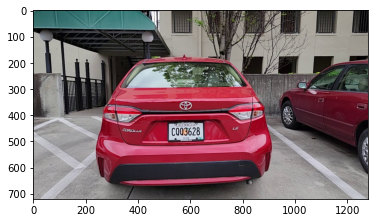

In [6]:
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))

True

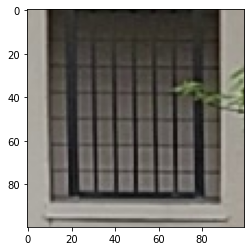

In [7]:
cropped_image = images[0][0:100,520:620]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

cv2.imwrite("Cropped Image.jpg", cropped_image)

In [8]:
d=dict()
d_norm=dict()
for i in range(0,620,20):
    for j in range(0,1180,20):
        d[str(i)+":"+str(i+100),str(j)+":"+str(j+100)]=ssd(cropped_image,images[12][i:i+100,j:j+100])
        #d_norm[str(i)+":"+str(i+100),str(j)+":"+str(j+100)]=ncc(norm_data(cropped_image),norm_data(images[0][i:i+100,j:j+100]))

In [9]:
a=min(d.items(), key=lambda x: x[1])
y1,y2=map(int,a[0][0].split(':'))
x1,x2=map(int,a[0][1].split(':'))


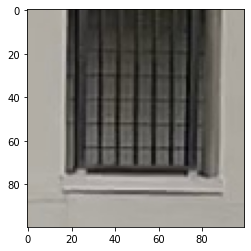

In [10]:
plt.imshow(cv2.cvtColor(images[12][y1:y2,x1:x2], cv2.COLOR_BGR2RGB))

In [11]:
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv2.rectangle(images[12], (x1,y1), (x2,y2), color, thickness)

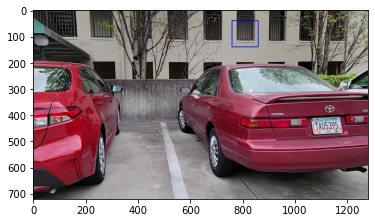

In [17]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

##### Motion tracking equation

In [96]:
Iref=cv2.imread('data/frame0.jpg',cv2.IMREAD_GRAYSCALE)
Inext=cv2.imread('data/frame30.jpg',cv2.IMREAD_GRAYSCALE)
Iref=np.array(Iref).astype(np.float32)
Inext=np.array(Inext).astype(np.float32)
kernel_x = np.array([[-1., 1.], [-1., 1.]])*.25
kernel_y = np.array([[-1., -1.], [1., 1.]])*.25
kernel_t = np.array([[1., 1.], [1., 1.]])*.25
Iref = Iref / 255. # normalize pixels
Inext = Inext / 255. # normalize pixels
Ix=cv2.filter2D(Iref,-1,kernel=kernel_x)
Iy=cv2.filter2D(Iref,-1,kernel=kernel_y)
It=cv2.filter2D(Iref,-1,kernel=kernel_t)+cv2.filter2D(Inext,-1,kernel=kernel_x)
Ix,Iy,It=np.array(Ix),np.array(Iy),np.array(It)

In [103]:
u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))


C:\Users\anant\AppData\Local\Temp/ipykernel_15740/2072950217.py:1: RuntimeWarning: divide by zero encountered in true_divide
  u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))
C:\Users\anant\AppData\Local\Temp/ipykernel_15740/2072950217.py:1: RuntimeWarning: invalid value encountered in true_divide
  u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))


In [104]:
u

array([[224.52206  , 223.88962  , 223.8893   , ...,   1.5135136,
          1.6142869,   1.6235628],
       [224.52173  , 223.88928  , 223.88962  , ...,   1.5135134,
          1.6142869,   1.6235628],
       [158.53748  , 158.09027  , 139.04636  , ...,   2.8125768,
          2.7348177,   4.3707867],
       ...,
       [ 42.29572  ,  42.29572  ,  90.0854   , ...,  25.744085 ,
         17.03911  ,  54.465305 ],
       [ 31.839685 ,  32.141964 ,  47.82018  , ...,  35.329903 ,
         23.784195 ,  14.581035 ],
       [ 27.80274  ,  28.153563 ,  70.99516  , ...,  41.042233 ,
         39.726547 ,  25.000002 ]], dtype=float32)

In [57]:
import cv2 as cv
import numpy as np


# The video feed is read in as
# a VideoCapture object
cap = cv.VideoCapture("20220417_151055.mp4")
ret, first_frame = cap.read()
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)
mask[..., 1] = 255

while(cap.isOpened()):

    ret, frame = cap.read()
    
    # Opens a new window and displays the input
    # frame
    cv.imshow("input", frame)
    
    # Converts each frame to grayscale - we previously
    # only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Calculates dense optical flow by Farneback method
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray,None,0.5, 3, 15, 3, 5, 1.2, 0)

    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
    # Sets image hue according to the optical flow
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
    
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
    
    # Opens a new window and displays the output frame
    cv.imshow("dense optical flow", rgb)
    
    # Updates previous frame
    prev_gray = gray
    
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# The following frees up resources and
# closes all windows
cap.release()
cv.destroyAllWindows()


#### LUCAS KANADE Algorithm

In [58]:
#'20220417_151055.mp4'
cap = cv2.VideoCapture(0)
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0, 255, (100, 3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret, frame = cap.read()
    if not ret:
        print('No frames grabbed!')
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    img = cv2.add(frame, mask)
    cv2.imshow('frame', img)
    if cv2.waitKey(1)==ord('q'):
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
cv2.destroyAllWindows()

### Disparity based depth estimation

In [67]:
ul,vl=721,108 # from matlab ginput()
ur,vr=20,110
b=546.1 # distance between left and right cameras
f=1403.54736624058 #focallength
z=(b*f)/(ul-ur) #distance of object
print('The distance is '+str(z)+'mm')

The distance is 1093.4054446561781mm


#### Multiple Face Tracking with lip tracking using HAARCASCADE

In [16]:
import os
import time

import imutils
detectorPaths = {
    
    "face": "face.xml",
    "smile": "smile.xml",
}

print("[INFO] loading haar cascades...")
detectors = dict()
 
for (name, path) in detectorPaths.items():
    detectors[name] = cv2.CascadeClassifier(path)

print("[INFO] starting video stream...")
vs = cv2.VideoCapture(0)

while True:
    _,frame = vs.read()
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faceRects = detectors["face"].detectMultiScale(
        gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE)

    for (fX, fY, fW, fH) in faceRects:
        faceROI = gray[fY:fY + fH, fX:fX + fW]
        smileRects = detectors["smile"].detectMultiScale(
            faceROI, scaleFactor=1.1, minNeighbors=10,
            minSize=(15, 15), flags=cv2.CASCADE_SCALE_IMAGE)
        for (sX, sY, sW, sH) in smileRects:
            ptA = (fX + sX, fY + sY)
            ptB = (fX + sX + sW, fY + sY + sH)
            cv2.rectangle(frame, ptA, ptB, (255, 0, 0), 2)
        cv2.rectangle(frame, (fX, fY), (fX + fW, fY + fH),
                      (0, 255, 0), 2)
    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) == ord("q"):
        break

cv2.destroyAllWindows()

[INFO] loading haar cascades...
[INFO] starting video stream...
